# Video: Clustering Data with Scikit-Learn

In this video, we will use Scikit-learn to cluster data, a kind of unsupervised learning that groups rows without requiring targets to guide the grouping.

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
penguins_adelie = pd.read_csv("https://raw.githubusercontent.com/bu-cds-omds/dx601-examples/refs/heads/main/data/palmer-penguins-adelie.csv", index_col="Sample Number")
penguins_gentoo = pd.read_csv("https://raw.githubusercontent.com/bu-cds-omds/dx601-examples/refs/heads/main/data/palmer-penguins-gentoo.csv", index_col="Sample Number")
penguins_chinstrap = pd.read_csv("https://raw.githubusercontent.com/bu-cds-omds/dx601-examples/refs/heads/main/data/palmer-penguins-chinstrap.csv", index_col="Sample Number")
penguins = pd.concat([penguins_adelie, penguins_gentoo, penguins_chinstrap])

## Penguins Species Exploration Recap


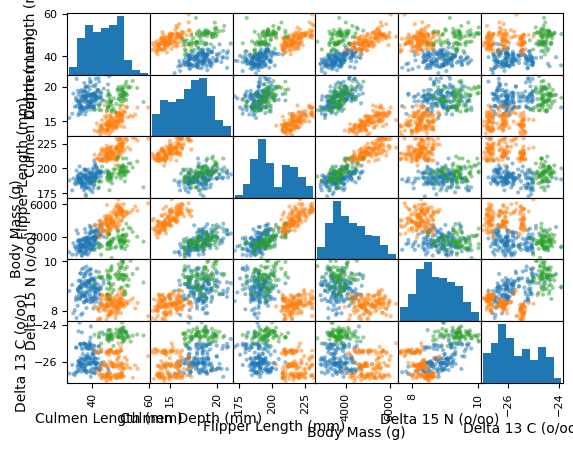

In [ ]:
penguins_colored = penguins.drop("Comments", axis=1).dropna()
penguins_colored["color"] = penguins_colored["Species"].map(dict(zip(penguins["Species"].unique(), plt.rcParams['axes.prop_cycle'].by_key()["color"])))
_ = pd.plotting.scatter_matrix(penguins_colored, color=penguins_colored["color"])

Script:
* Last week, we saw this chart while exploring the Palmer penguins dataset, and I remarked that the color separation meant that we could make a model distinguishing the penguin species.
* In this video, I will demonstrate scikit-learn's clustering functionality as a way to implement such a model semi-automatically.
* My focus won't be on building a full model to separate the penguin species, just showing that clustering can be a helpful component.

## A Penguin Chart with Nice Species Separation


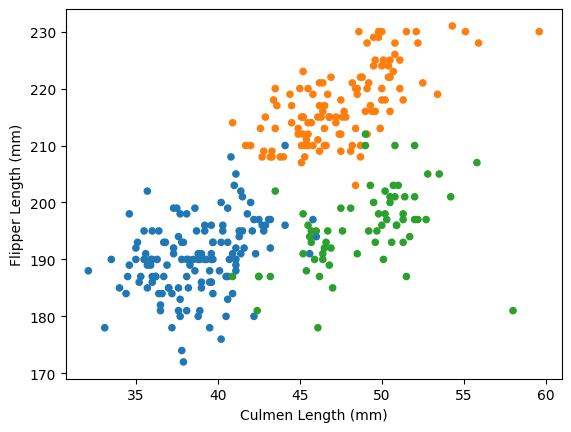

In [ ]:
_ = penguins_colored.plot.scatter("Culmen Length (mm)", "Flipper Length (mm)", c="color")

Script:
* Here is one of those scatter plots zoomed in.
* This one looks at flipper length and culmen length.


## Manually Separating Penguin Species


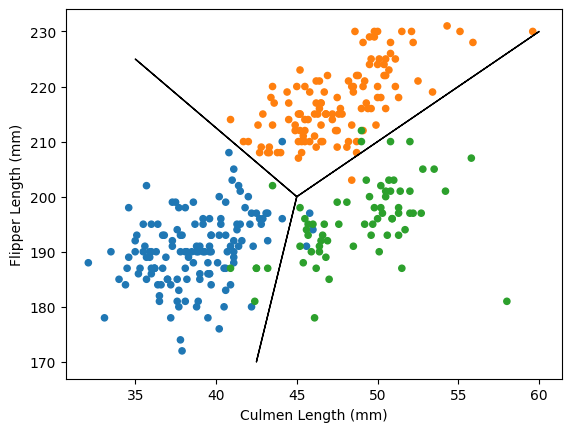

In [ ]:
penguins_colored.plot.scatter("Culmen Length (mm)", "Flipper Length (mm)", c="color")
plt.arrow(45, 200, 15, 30)
plt.arrow(45, 200, -2.5, -30)
plt.arrow(45, 200, -10, 25)

None

Script:
* When I said the color separation implied we could build a model, I was thinking of a picture like this.
* The lines could be tweaked, but each section is nearly all the same color, so nearly all the same species.
* This is pretty informal, but it was trivial for me to pick those lines by hand.
* It was easier because there is a bit of space between the concentrations of colors.
* I just picked a point in the middle, and drew lines through the empty space between clusters.
* We should be able to make models that can do this automatically too.
* Scikit-learn's clustering functionality will give us something similar.

Script:
* To get started, I will import the cluster subpackage, and prepare a data frame with the two columns that I plotted above.

In [ ]:
import sklearn.cluster

In [ ]:
penguins_input = penguins[["Culmen Length (mm)", "Flipper Length (mm)"]].dropna()

Script:
* I also dropped the rows that had missing data.
* I will demonstrate clustering using the k-means algorithm.
* You do not need to know how this works now, but it works by picking cluster centers and grouping data points with the closest cluster centers.

In [ ]:
cluster_model = sklearn.cluster.KMeans(n_clusters=3)
cluster_model.fit(penguins_input)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

Script:
* I configured this model to make 3 clusters to match the three species.
* The fitting process is similar to the regressions and classifications that we previously ran, but we only need to pass in input columns.
* There is no output column to pass in for training a cluster model.
* Let's see how it did.

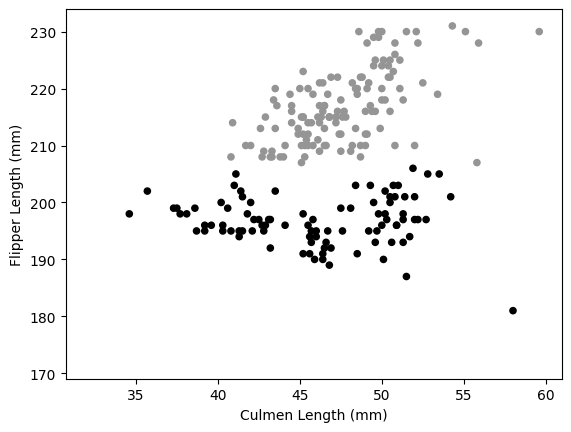

In [ ]:
penguins_input.plot.scatter("Culmen Length (mm)", "Flipper Length (mm)",
                            c=cluster_model.predict(penguins_input))
None

Script:
* This looks weird.
* I only see two colors, and there are no points shown in the bottom left.
* It turns out one end of the default colors is white... which is not so helpful with a white background.
* Let's change the colormap real quick.

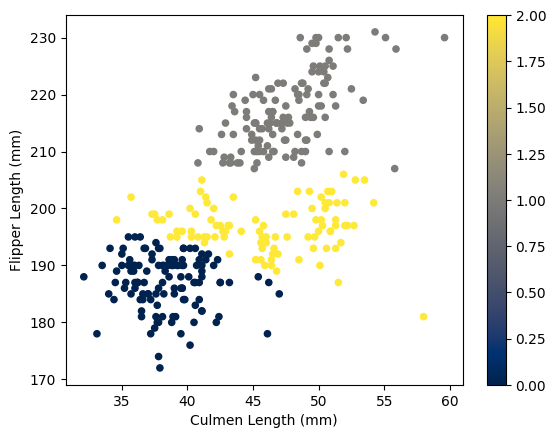

In [ ]:
penguins_input.plot.scatter("Culmen Length (mm)", "Flipper Length (mm)",
                            c=cluster_model.predict(penguins_input),
                            colormap="cividis")
None

Script:
* That doesn't match up how I remember the species.
* Let's double check that.

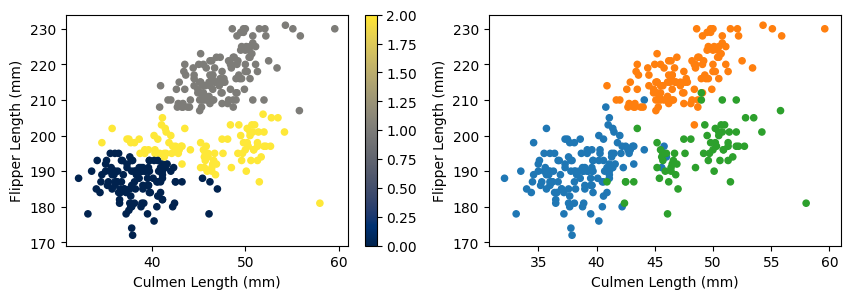

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
penguins_input.plot.scatter("Culmen Length (mm)", "Flipper Length (mm)",
                            c=cluster_model.predict(penguins_input),
                            colormap="cividis",
                            ax=plt.gca())

plt.subplot(1, 2, 2)
penguins_colored.plot.scatter("Culmen Length (mm)", "Flipper Length (mm)", c="color", ax=plt.gca())

plt.subplots_adjust(hspace=0.9)

Script:
* Those plots do not quite lineup because of the color scale on the left, but you can see that they disagree about how to split the bottom area.
* In the automatic cluster, the middle left area is grouped with the middle right area.
* But when we look at the species colors, we see that middle left area should be grouped with the bottom left area.
* I tried one more clustering to see how it would break it up if a few more clusters were allowed.

In [ ]:
cluster_model_5 = sklearn.cluster.KMeans(n_clusters=5, n_init=10)
cluster_model_5.fit(penguins_input)

KMeans(n_clusters=5, n_init=10)

Script:
* This time I ran it with 5 clusters instead of 3.
* And the extra `n_init` parameter is to suppress the warning that came from the first model above.
* Let's plot that one now.

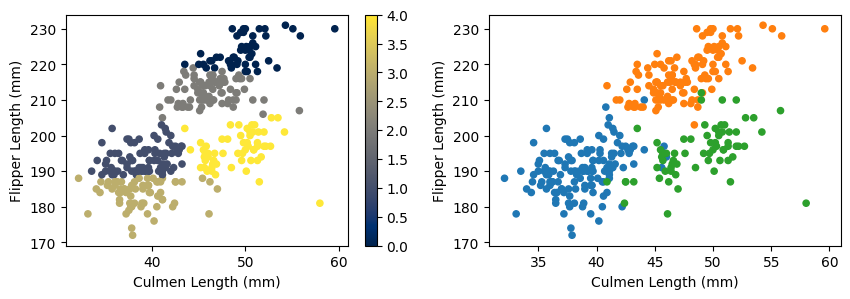

In [ ]:
plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
penguins_input.plot.scatter("Culmen Length (mm)", "Flipper Length (mm)",
                            c=cluster_model_5.predict(penguins_input),
                            colormap="cividis",
                            ax=plt.gca())

plt.subplot(1, 2, 2)
penguins_colored.plot.scatter("Culmen Length (mm)", "Flipper Length (mm)", c="color", ax=plt.gca())

plt.subplots_adjust(hspace=0.9)

None

Script:
* With 5 clusters, the species boundaries are more closely matched.
* Two of the species have two clusters.
* The third just has one cluster.
* So you could build a classification model that checks which cluster a data point belongs to, and output the species of that cluster.
* I won't build that model now, since I just wanted to show off the easy clustering capability of scikit-learn.
